In [136]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [137]:
url = "https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31"
soup = requests.get(url)
imdb_html = BeautifulSoup(soup.content, "html.parser")

In [138]:
content = imdb_html.find_all('div', attrs={'class' : 'lister-item-content'})

In [139]:
temp = []
for i in range(0, len(content)) :
    title = content[i].a.text
    title = title.strip()
    rating = content[i].strong.text
    rating = rating.strip()
    try:
        metascore_mixed = content[i].find('span', attrs={'class' : 'metascore mixed'}).text
        metascore_mixed = metascore_mixed.strip()
    except:
        metascore_mixed = " "
    try:
        metascore_favorable = content[i].find('span', attrs={'class' : 'metascore favorable'}).text
        metascore_favorable = metascore_favorable.strip()
    except:
        metascore_favorable = " "
    votes = content[i].find('span', attrs={'name' : 'nv'}).text
    votes = votes.strip()
  
    temp.append((title, rating, metascore_mixed, metascore_favorable, votes))
    



In [140]:
imdb_table = pd.DataFrame(temp, columns=('Judul', 'Rating', 'Metascore_Mixed', 'Metascore_Favorable', 'Votes'))
imdb_table['Rating'] = imdb_table['Rating'].astype('float64')
imdb_table.head()

,Judul,Rating,Metascore_Mixed,Metascore_Favorable,Votes
0,Star Wars: Episode IX - The Rise of Skywalker,6.7,53,,"319,690"
1,The Mandalorian,8.7,,,"167,284"
2,After Life,8.5,,,"67,297"
3,Dead to Me,8.1,,,"37,439"
4,Once Upon a Time... in Hollywood,7.7,,83,"462,778"


In [141]:
imdb_table['Metascore'] = imdb_table['Metascore_Favorable'] + imdb_table['Metascore_Mixed']

final_table = imdb_table[['Judul', 'Rating', 'Metascore', 'Votes']]

In [142]:
final_table = final_table.replace(r'^\s*$', np.nan, regex=True)
final_table['Metascore'] = final_table['Metascore'].astype('float64')
final_table['Votes'] = final_table['Votes'].str.replace(",", "").astype('int64')
final_table.dtypes

Judul         object
Rating       float64
Metascore    float64
Votes          int64
dtype: object

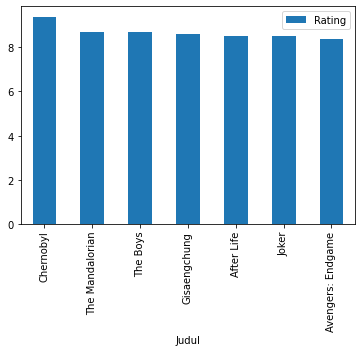

In [143]:
final_table.set_index('Judul')[['Rating']].sort_values('Rating', ascending=False).head(7).plot(kind='bar')

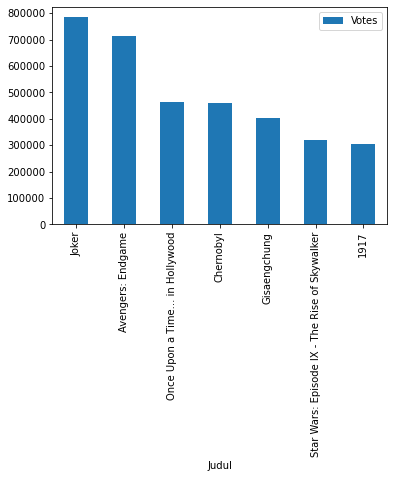

In [144]:
final_table.set_index('Judul')[['Votes']].sort_values('Votes', ascending=False).head(7).plot(kind='bar')

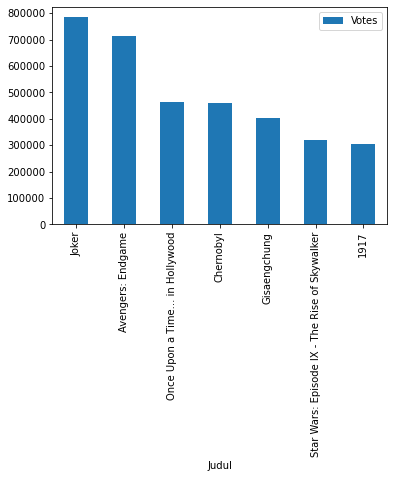

In [145]:
final_table.set_index('Judul')[['Votes']].sort_values('Votes', ascending=False).head(7).plot(kind='bar')